<a href="https://colab.research.google.com/github/owaisorakzai/Computer-Vision/blob/main/Emnist_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import idx2numpy
from google.colab import files
from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import torch

In [ ]:
f_read = open('gdrive/My Drive/dataset/emnist-balanced-train-images-idx3-ubyte', 'rb')
train = idx2numpy.convert_from_file(f_read)
f_read = open('gdrive/My Drive/dataset/emnist-balanced-train-labels-idx1-ubyte', 'rb')
train_labels = idx2numpy.convert_from_file(f_read)

array([32], dtype=uint8)

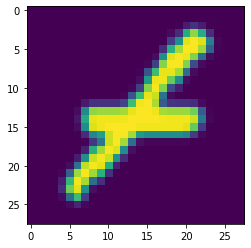

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(train[100])
train_labels=train_labels.reshape(112800,1)
max=np.max(train_labels)
min=np.min(train_labels)

train_labels[13187]



In [ ]:
import os.path
from os import path
os.mkdir("Project/")
os.mkdir("Project/train")
os.mkdir("Project/test")



In [ ]:
from PIL import Image
i=0

print()
while i<=max:
  dir='Project/train/'+str(i)+'/'
  os.mkdir(dir)
  j=0
  while j<train_labels.shape[0]:
    if i==train_labels[j]:
      img = Image.fromarray(train[j], 'L')
      direct=dir+str(j)+".jpeg"
      img.save(direct)
    j+=1
  i+=1


In [ ]:
f_read = open('gdrive/My Drive/dataset/emnist-balanced-test-images-idx3-ubyte', 'rb')
test = idx2numpy.convert_from_file(f_read)
f_read = open('gdrive/My Drive/dataset/emnist-balanced-test-labels-idx1-ubyte', 'rb')
test_labels = idx2numpy.convert_from_file(f_read)

46 0


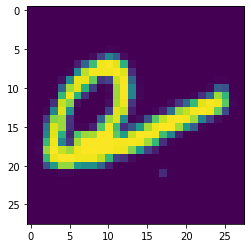

In [ ]:
plt.imshow(test[2])
train_labels=test_labels.reshape(18800,1)
max=np.max(test_labels)
min=np.min(test_labels)
print(max,min)

In [ ]:
from PIL import Image
i=0
print()
while i<=max:
  dir='Project/test/'+str(i)+'/'
  os.mkdir(dir)
  j=0
  while j<test_labels.shape[0]:
    if i==test_labels[j]:
      img = Image.fromarray(test[j], 'L')
      direct=dir+str(j)+".jpeg"
      img.save(direct)
    j+=1
  i+=1

In [ ]:
import torchvision
import torch.utils.data as data
train = torchvision.datasets.ImageFolder(root='Project/train',	transform=torchvision.transforms.Compose([
		torchvision.transforms.ToTensor()
	]))
train_set = torch.utils.data.DataLoader(train, batch_size=4,
                                          shuffle=True)
train_set


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
epochs=1
batch_size=1
learning_rate=0.01
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 3)
        self.conv2 = nn.Conv2d(10, 40, 3)
        self.conv3 = nn.Conv2d(40,80 , 3)
        self.conv4 = nn.Conv2d(80, 100, 3)


        self.fc1 = nn.Linear(20 * 20 *100, 120)
        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 47)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x)) 
        x = F.relu(self.conv4(x))
        x = x.view(-1, 20 * 20 * 100)         
        x = F.relu(self.fc1(x))           
        x = F.relu(self.fc2(x))          
        x = self.fc3(x)             
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_set)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_set,0):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/1], Step [2000/28200], Loss: 3.7630
Epoch [1/1], Step [4000/28200], Loss: 1.7268
Epoch [1/1], Step [6000/28200], Loss: 1.0825
Epoch [1/1], Step [8000/28200], Loss: 2.0056
Epoch [1/1], Step [10000/28200], Loss: 0.9542
Epoch [1/1], Step [12000/28200], Loss: 0.7347
Epoch [1/1], Step [14000/28200], Loss: 0.1198
Epoch [1/1], Step [16000/28200], Loss: 0.0683
Epoch [1/1], Step [18000/28200], Loss: 0.5926
Epoch [1/1], Step [20000/28200], Loss: 0.0747
Epoch [1/1], Step [22000/28200], Loss: 0.0857
Epoch [1/1], Step [24000/28200], Loss: 0.3163
Epoch [1/1], Step [26000/28200], Loss: 0.1345
Epoch [1/1], Step [28000/28200], Loss: 1.4539


In [ ]:
PATH = 'gdrive/My Drive/dataset/model.pth'
torch.save(model.state_dict(), PATH)


test = torchvision.datasets.ImageFolder(root='Project/test',	transform=torchvision.transforms.Compose([
		torchvision.transforms.ToTensor()
	]))
test_set = torch.utils.data.DataLoader(train, batch_size=4,
                                          shuffle=True)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_set:
        images,labels=data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 85 %


In [ ]:
f = open("gdrive/My Drive/dataset/classes.txt", "w")
f.write("mu")

2